# Week 2

## Activity 2

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [13]:
def diffyqs(t, curr_vals, omega2):
    # 2 first-order differential equations for a SHO
    # first 2 arguments are always t and curr_vals, which are followed by any parameters of your ODEs
    x, v = curr_vals   # unpack current values
    
    vdot = -omega2 * x # calculate derivative

    return v, vdot # return derivatives

In [14]:
tmax = 15
dt = 0.1
tspan = (0, tmax)         # time span
t = np.arange(0, tmax, dt) # specific times to return solutions for

In [15]:
omega2 = 2
initial_condition = [1, 0] # pull back 1m, no initial velocity

In [16]:
solved = solve_ivp(diffyqs, tspan, initial_condition, t_eval = t, args = (omega2, ), method="RK45")


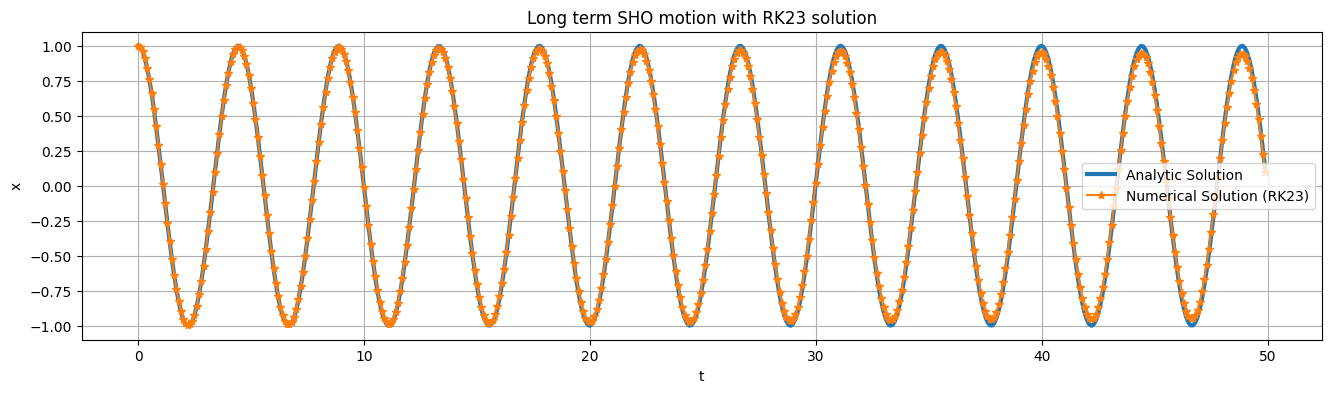

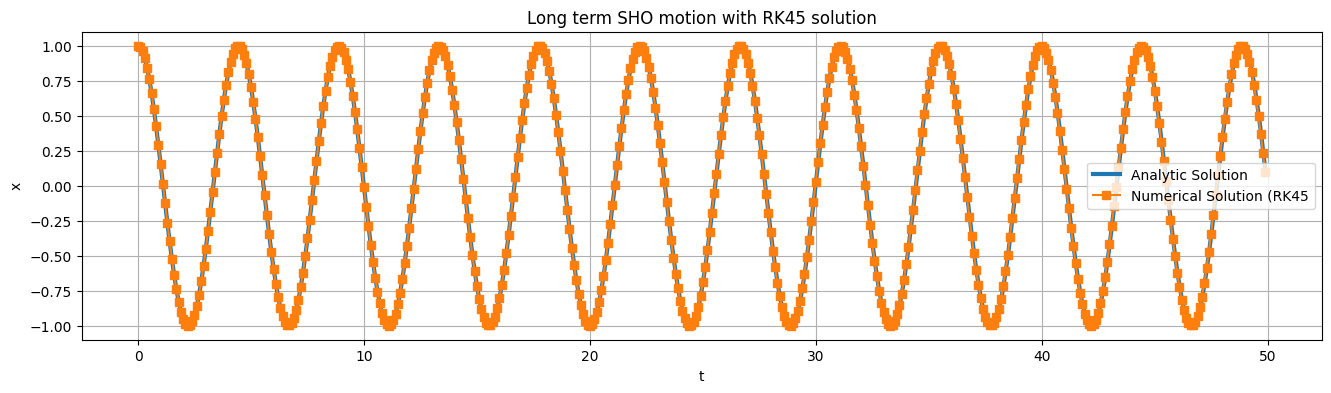

In [17]:
# 1. Derivatives Function
def diffyqs(t, curr_vals, omega2):
    x, v = curr_vals 
    vdot = -omega2 * x
    return v, vdot

# 2. Time Setup
tmax = 50
dt = 0.1
tspan = (0, tmax)
t = np.arange(0, tmax, dt)

# 3. Parameters and Initial Conditions
omega2 = 2
initial_condition = [1, 0] 

# 4. Call Integrator (RK45 is the default)
RK23solved = solve_ivp(diffyqs, tspan, initial_condition, t_eval = t, args = (omega2,), method="RK23")
RK45solved = solve_ivp(diffyqs, tspan, initial_condition, t_eval = t, args = (omega2,), method="RK45")

# 5. Visualization and Comparison to analytical solution
def analytic_sol(t, omega0, initial_condition):
    x0, v0 = initial_condition
    return (v0/omega0)*np.sin(omega0*t) + x0 * np.cos(omega0*t)

plt.figure(figsize=(16, 4))
plt.plot(t, analytic_sol(t, omega2**0.5,initial_condition), label = "Analytic Solution", linewidth = 3)
plt.plot(t, RK23solved.y[0], label = "Numerical Solution (RK23)", marker='*')
plt.title("Long term SHO motion with RK23 solution")
plt.xlabel("t")
plt.ylabel("x")
plt.legend()
plt.grid()

plt.figure(figsize=(16,4))
plt.plot(t,analytic_sol(t, omega2**0.5,initial_condition), label = "Analytic Solution", linewidth = 3)
plt.plot(t,RK45solved.y[0], label = "Numerical Solution (RK45", marker='s')
plt.title("Long term SHO motion with RK45 solution")
plt.xlabel("t")
plt.ylabel("x")
plt.legend()
plt.grid()

Next part

$z = c\rho^2$

$$
\dot v = \ddot \rho = \frac{\rho \dot \phi^2 - 4 c^2 \rho \dot \rho^2 - 2cg\rho }{1 + 4c^2 \rho^2} \\
= \frac{\rho \omega^2 - 4 c^2 \rho v^2 - 2cg\rho }{1 + 4c^2 \rho^2}\\


\dot \omega = \ddot \phi = -2\frac{\dot \rho \dot \phi}{\rho}\\
= -2\frac{v \omega}{\rho}\\

\omega = \dot \phi 
$$

In [38]:
# 1. Derivatives Function
def diffyqs(t, curr_vals, g, c):

    r, v, theta, omega = curr_vals
    
    vdot = (r * omega**2 - 4 * c**2 * r * v**2 - 2 * c *g * r)/(1+ 4 * c**2 * r**2)

    omegadot = -2 * v * omega / r

    return v, vdot, omega, omegadot # solution will return in this order, but integrated (r,v,theta,ω)

# 2. Time Setup
tmax = 40
dt = 0.01 # unneccecarily small dt to make plot super smooth
t = np.arange(0, tmax, dt)

# 3. Parameters and Initial Conditions
c = 1
g = 1
x0 = [2.6,0,0,4] #r, v, theta, omega

# 4. Call Integrator
solved = solve_ivp(diffyqs, (0, tmax), x0, t_eval = t, args = (g, c, ), method="RK45")

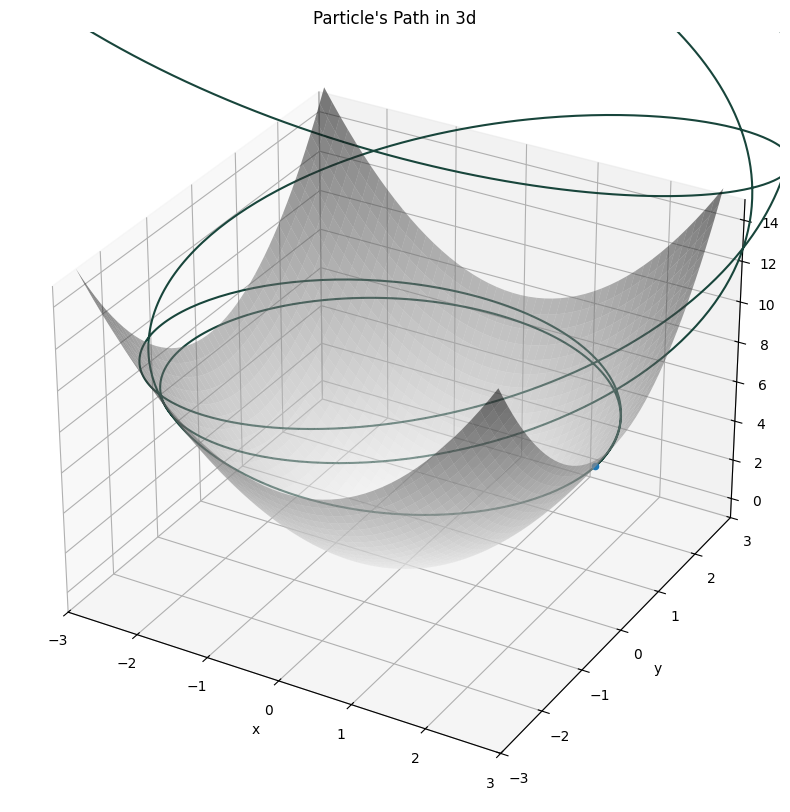

In [49]:
def parabaloid(x, y, alpha=1.):
    # function of a paraboloid in Cartesian coordinates
    return alpha * (x**2 + y**2)

def cylindrical_to_cartesian(r, th, alpha=1.):
    # convert back to cartesian coordinates for ease of plotting
    r = np.array(r)
    th = np.array(th)
    x = r*np.cos(th)
    y = r*np.sin(th)
    return x,y,parabaloid(x, y, alpha)

def plot_solution(solved):
    # Function to plot the trajectory 

    # points of the surface to plot
    x = np.linspace(-2.8, 2.8, 50)
    y = np.linspace(-2.8, 2.8, 50)
    alpha = c
    # construct meshgrid for plotting
    X, Y = np.meshgrid(x, y)
    Z = parabaloid(X, Y, alpha)

    # get trajectory in cartesian coords
    xtraj, ytraj, ztraj = cylindrical_to_cartesian(solved.y[0], solved.y[2], alpha)

    # plot plot plot
    fig = plt.figure(figsize = (10,10))
    ax = plt.axes(projection='3d')
    plt.title("Particle's Path in 3d")
    ax.plot_surface(X, Y, Z, cmap='binary', alpha=0.5) 
    ax.plot3D(xtraj, ytraj, ztraj, c = "#18453B")
    ax.set_xlim(-3, 3); ax.set_ylim(-3, 3); ax.set_zlim(-1 ,15)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.scatter(xtraj[0], ytraj[0], ztraj[0])
    plt.show()

plot_solution(solved)

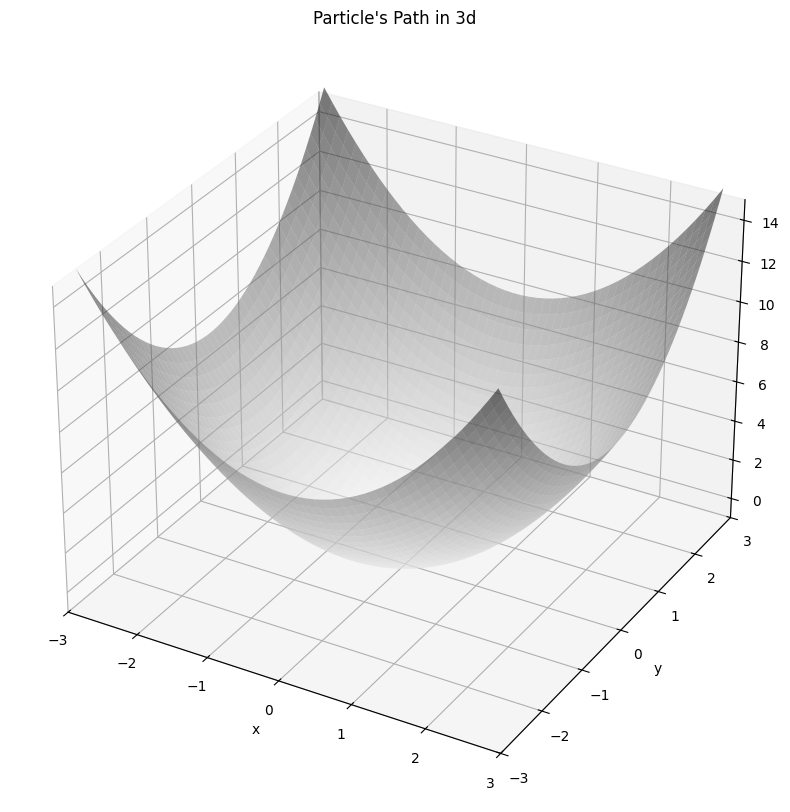

In [57]:
from matplotlib.animation import PillowWriter

def plot_video(solved, tmax, dt):
    # Function to plot the trajectory 

    # points of the surface to plot
    x = np.linspace(-2.8, 2.8, 50)
    y = np.linspace(-2.8, 2.8, 50)
    alpha = c
    # construct meshgrid for plotting
    X, Y = np.meshgrid(x, y)
    Z = parabaloid(X, Y, alpha)

    # get trajectory in cartesian coords
    xtraj, ytraj, ztraj = cylindrical_to_cartesian(solved.y[0], solved.y[2], alpha)

    # plot plot plot
    fig = plt.figure(figsize = (10,10))
    ax = plt.axes(projection='3d')
    plt.title("Particle's Path in 3d")
    ax.plot_surface(X, Y, Z, cmap='binary', alpha=0.5) 
    ax.set_xlim(-3, 3); ax.set_ylim(-3, 3); ax.set_zlim(-1 ,15)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    frames = tmax / dt
    metadata = {'title': 'Movie', 'artist': 'AndrewKoren'}
    capture_rate = 50 # captures 1/rate frames
    writer = PillowWriter(fps=frames/capture_rate)
    with writer.saving(fig, 'chaos.gif', 100):
        for tval in range(int(frames)):

            
            writer.grab_frame()





    
    
plot_video(solved)

AttributeError: 'ArtistList' object has no attribute 'remove'

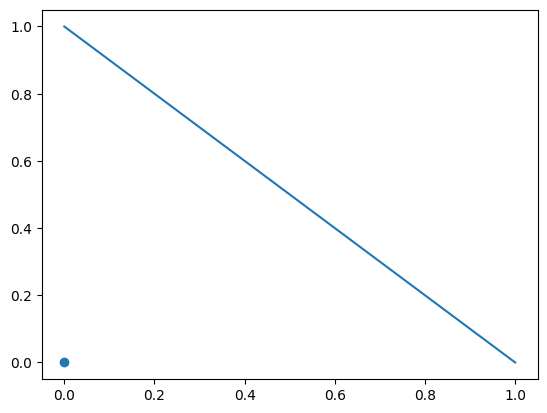

In [77]:
fig, ax = plt.subplots(1, 1)
ax.scatter(0, 0)
ax.plot([1,0], [0,1])
ax.